In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # 作業 Day3-1
 ## 練習時間
 在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

 請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

 #### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

 ### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [2]:
import pandas as pd
import numpy as np


In [3]:
countries = ['Seven Kingdoms','Valyrian','Qarth','Ghiscari','Summer Islands']
up_limit = np.iinfo(np.uint16).max
population = np.random.randint(up_limit,size=len(countries))

list_labels = ['國家','人口']
list_cols = [countries, population]

zipped = list(zip(list_labels, list_cols))
world = pd.DataFrame(dict(zipped))

print(world)


      人口              國家
0  25407  Seven Kingdoms
1    608        Valyrian
2  31840           Qarth
3  61869        Ghiscari
4  13371  Summer Islands


In [4]:
mostPeople = world.max()
print("人口最多的國家是：{}, 人口數：{}".format(mostPeople['國家'],mostPeople['人口']))


人口最多的國家是：Valyrian, 人口數：61869


 # 作業 Day3-2
 ## 讀取 txt 檔
 * 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
 * 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

 ### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
 ### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
 ### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [4]:
# import 要用的 lib
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


In [5]:
# 1.抓取文字檔的資訊
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
data = response.text


In [6]:
# 2.處理該文字檔內容
url_list = []
for line in data.split('\n'):
    sentence = line.split('\t')
    url_list.append(sentence)

print("We get {} urls.".format(len(url_list)))


We get 9996 urls.


In [7]:
# 3.轉成 pandas dataframe
url_pd = pd.DataFrame(url_list,columns=['name', 'url'])


In [8]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except Exception:
            print("url fail : ",url)

    return img_list


url fail :  http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


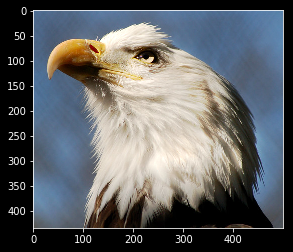

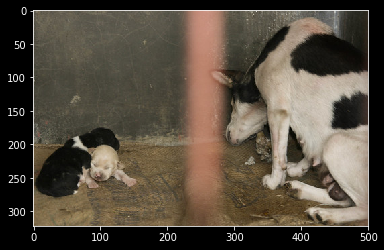

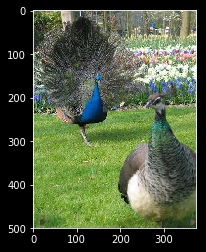

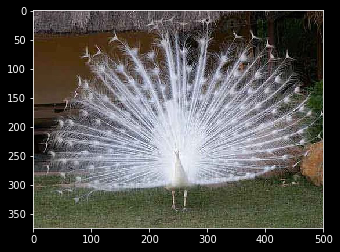

In [9]:
# 4.取出部分的資料
a = url_pd.head()
result = img2arr_fromURLs(list(a['url']))
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

